In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

In [2]:
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
#Loading training and test data and concatanate


training_data = pd.read_csv('UNSW_NB15_training-set.csv')
testing_data = pd.read_csv('UNSW_NB15_testing-set.csv')

In [4]:
training_data

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.121478   tcp       -   FIN      6      4     258     172   
1            2  0.649902   tcp       -   FIN     14     38     734   42014   
2            3  1.623129   tcp       -   FIN      8     16     364   13186   
3            4  1.681642   tcp     ftp   FIN     12     12     628     770   
4            5  0.449454   tcp       -   FIN     10      6     534     268   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
175336  175337  0.000009   udp     dns   INT      2      0     114       0   
175337  175338  0.505762   tcp       -   FIN     10      8     620     354   
175338  175339  0.000009   udp     dns   INT      2      0     114       0   
175339  175340  0.000009   udp     dns   INT      2      0     114       0   
175340  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0           74.087490  ...                 1               1             0   
1           78.473372  ...                 1               2             0   
2           14.170161  ...                 1               3             0   
3           13.677108  ...                 1               3             1   
4           33.373826  ...                 1              40             0   
...               ...  ...               ...             ...           ...   
175336  111111.107200  ...                13              24             0   
175337      33.612649  ...                 1               2             0   
175338  111111.107200  ...                 3              13             0   
175339  111111.107200  ...                14              30             0   
175340  111111.107200  ...                16              30             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0                0                 0           1           1                0   
1                0                 0           1           6                0   
2                0                 0           2           6                0   
3                1                 0           2           1                0   
4                0                 0           2          39                0   
...            ...               ...         ...         ...              ...   
175336           0                 0          24          24                0   
175337           0                 0           1           1                0   
175338           0                 0           3          12                0   
175339           0                 0          30          30                0   
175340           0                 0          30          30                0   

        attack_cat  label  
0           Normal      0  
1           Normal      0  
2           Normal      0  
3           Normal      0  
4           Normal      0  
...            ...    ...  
175336     Generic      1  
175337   Shellcode      1  
175338     Generic      1  
175339     Generic      1  
175340     Generic      1  

[175341 rows x 45 columns]

In [5]:
testing_data

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.000011   udp       -   INT      2      0     496       0   
1          2  0.000008   udp       -   INT      2      0    1762       0   
2          3  0.000005   udp       -   INT      2      0    1068       0   
3          4  0.000006   udp       -   INT      2      0     900       0   
4          5  0.000010   udp       -   INT      2      0    2126       0   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0       90909.090200  ...                 1               2             0   
1      125000.000300  ...                 1               2             0   
2      200000.005100  ...                 1               3             0   
3      166666.660800  ...                 1               3             0   
4      100000.002500  ...                 1               3             0   
...              ...  ...               ...             ...           ...   
82327  200000.005100  ...                 1               2             0   
82328      24.410067  ...                 1               1             0   
82329       0.000000  ...                 1               1             0   
82330       0.000000  ...                 1               1             0   
82331  111111.107200  ...                 1               1             0   

       ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0               0                 0           1           2                0   
1               0                 0           1           2                0   
2               0                 0           1           3                0   
3               0                 0           2           3                0   
4               0                 0           2           3                0   
...           ...               ...         ...         ...              ...   
82327           0                 0           2           1                0   
82328           0                 0           3           2                0   
82329           0                 0           1           1                1   
82330           0                 0           1           1                1   
82331           0                 0           1           1                0   

       attack_cat  label  
0          Normal      0  
1          Normal      0  
2          Normal      0  
3          Normal      0  
4          Normal      0  
...           ...    ...  
82327      Normal      0  
82328      Normal      0  
82329      Normal      0  
82330      Normal      0  
82331      Normal      0  

[82332 rows x 45 columns]

In [6]:
concatenated_data = pd.concat([training_data, testing_data])

In [7]:
concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sin

In [8]:
unique_categories = concatenated_data['attack_cat'].unique()

unique_categories

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [9]:
unique_labels = concatenated_data['label'].unique()

unique_labels

array([0, 1])

In [10]:
concatenated_data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [11]:
useful_data = concatenated_data.dropna()

In [12]:
useful_data.shape

(257673, 45)

<AxesSubplot:>

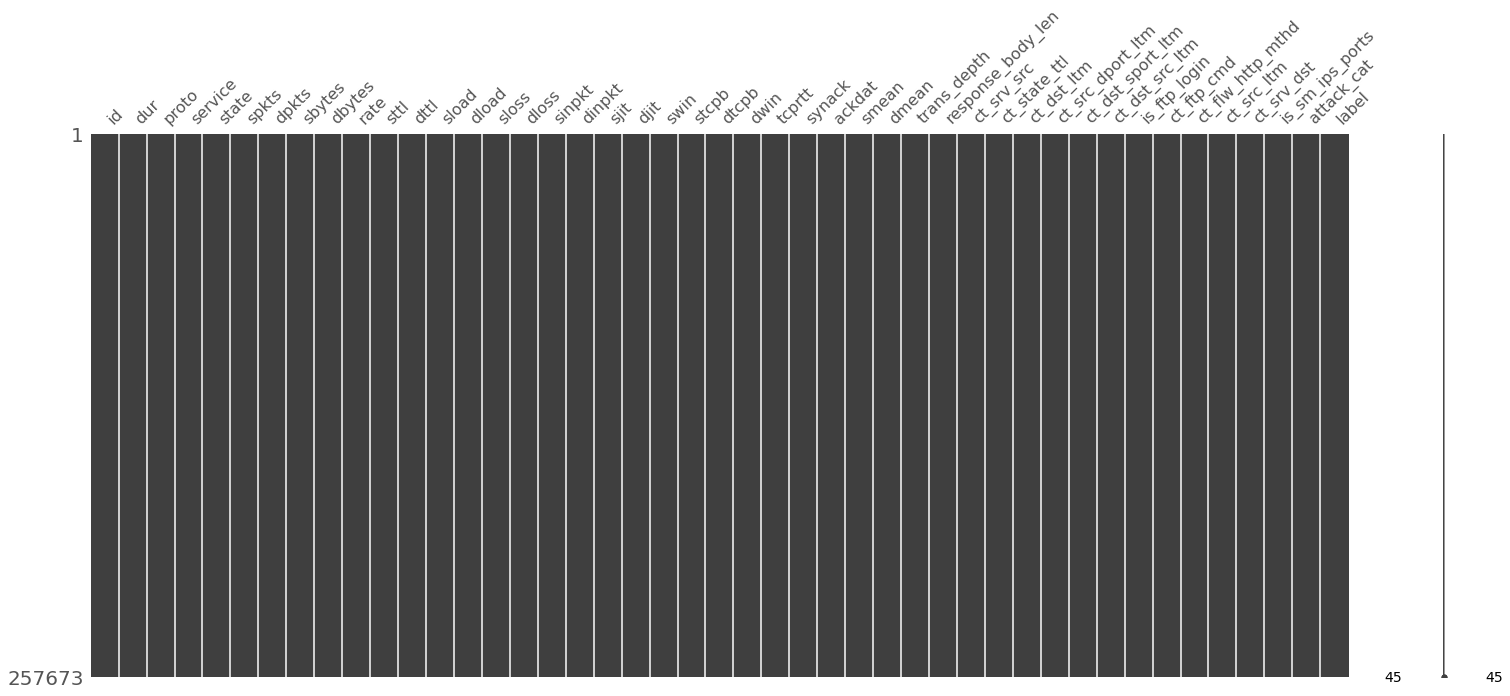

In [13]:
import missingno
import pickle

missingno.matrix(useful_data)

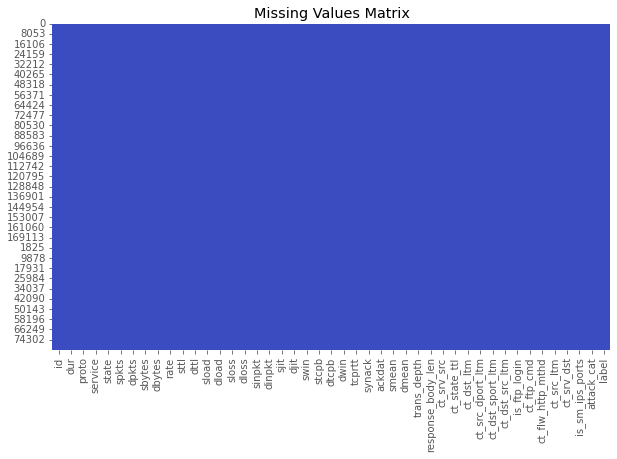

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(useful_data.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Values Matrix')
plt.show()

In [15]:
useful_data.describe(include="all")

id            dur   proto service   state          spkts  \
count   257673.000000  257673.000000  257673  257673  257673  257673.000000   
unique            NaN            NaN     133      13      11            NaN   
top               NaN            NaN     tcp       -     FIN            NaN   
freq              NaN            NaN  123041  141321  117164            NaN   
mean     72811.823858       1.246715     NaN     NaN     NaN      19.777144   
std      48929.917641       5.974305     NaN     NaN     NaN     135.947152   
min          1.000000       0.000000     NaN     NaN     NaN       1.000000   
25%      32210.000000       0.000008     NaN     NaN     NaN       2.000000   
50%      64419.000000       0.004285     NaN     NaN     NaN       4.000000   
75%     110923.000000       0.685777     NaN     NaN     NaN      12.000000   
max     175341.000000      59.999989     NaN     NaN     NaN   10646.000000   

                dpkts        sbytes        dbytes          rate  ...  \
count   257673.000000  2.576730e+05  2.576730e+05  2.576730e+05  ...   
unique            NaN           NaN           NaN           NaN  ...   
top               NaN           NaN           NaN           NaN  ...   
freq              NaN           NaN           NaN           NaN  ...   
mean        18.514703  8.572952e+03  1.438729e+04  9.125391e+04  ...   
std        111.985965  1.737739e+05  1.461993e+05  1.603446e+05  ...   
min          0.000000  2.400000e+01  0.000000e+00  0.000000e+00  ...   
25%          0.000000  1.140000e+02  0.000000e+00  3.078928e+01  ...   
50%          2.000000  5.280000e+02  1.780000e+02  2.955665e+03  ...   
75%         10.000000  1.362000e+03  1.064000e+03  1.250000e+05  ...   
max      11018.000000  1.435577e+07  1.465753e+07  1.000000e+06  ...   

        ct_dst_sport_ltm  ct_dst_src_ltm   is_ftp_login     ct_ftp_cmd  \
count      257673.000000   257673.000000  257673.000000  257673.000000   
unique               NaN             NaN            NaN            NaN   
top                  NaN             NaN            NaN            NaN   
freq                 NaN             NaN            NaN            NaN   
mean            4.032677        8.322964       0.012819       0.012850   
std             5.831515       11.120754       0.116091       0.116421   
min             1.000000        1.000000       0.000000       0.000000   
25%             1.000000        1.000000       0.000000       0.000000   
50%             1.000000        3.000000       0.000000       0.000000   
75%             3.000000        8.000000       0.000000       0.000000   
max            46.000000       65.000000       4.000000       4.000000   

        ct_flw_http_mthd     ct_src_ltm     ct_srv_dst  is_sm_ips_ports  \
count      257673.000000  257673.000000  257673.000000    257673.000000   
unique               NaN            NaN            NaN              NaN   
top                  NaN            NaN            NaN              NaN   
freq                 NaN            NaN            NaN              NaN   
mean            0.132005       6.800045       9.121049         0.014274   
std             0.681854       8.396266      10.874752         0.118618   
min             0.000000       1.000000       1.000000         0.000000   
25%             0.000000       2.000000       2.000000         0.000000   
50%             0.000000       3.000000       4.000000         0.000000   
75%             0.000000       8.000000      11.000000         0.000000   
max            30.000000      60.000000      62.000000         1.000000   

        attack_cat          label  
count       257673  257673.000000  
unique          10            NaN  
top         Normal            NaN  
freq         93000            NaN  
mean           NaN       0.639077  
std            NaN       0.480269  
min            NaN       0.000000  
25%            NaN       0.000000  
50%            NaN       1.000000  
75%            NaN       1.000000  
max            NaN 

<AxesSubplot:>

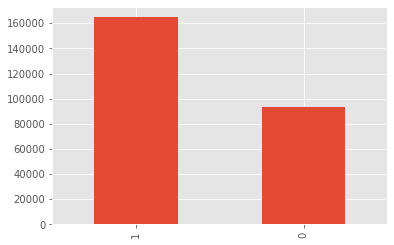

In [16]:
useful_data['label'].value_counts().plot.bar()

<AxesSubplot:>

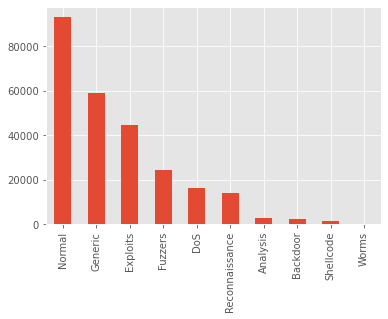

In [17]:
useful_data['attack_cat'].value_counts().plot.bar()

In [18]:
useful_data['label'].value_counts(normalize=True)

1    0.639077
0    0.360923
Name: label, dtype: float64

In [19]:
labels = useful_data['label']
attacks = useful_data['attack_cat']

In [20]:
def AttackLabel_ratio(input):
    
    #Calculate ratio
    
    unique, count = np.unique(input, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

Distributions of labels: 0.6:1 (93000/164673)


/Users/mdtohidulislam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


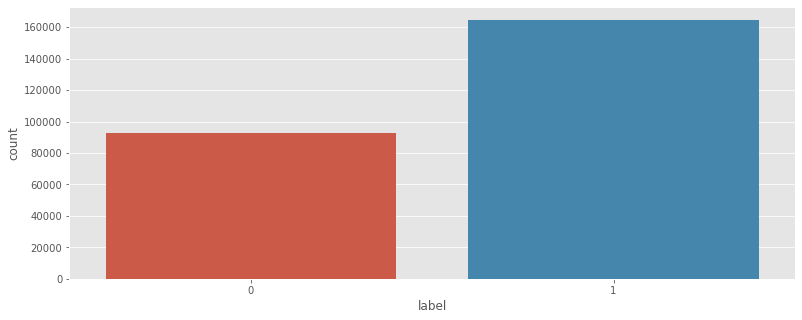

In [21]:
print('Distributions of labels:', AttackLabel_ratio(labels))
plt.figure(figsize=(13,5))
sns.countplot(labels,label="Sum")
plt.show()

Distribution of attack types: 1.1:1 (2677/2329)


/Users/mdtohidulislam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


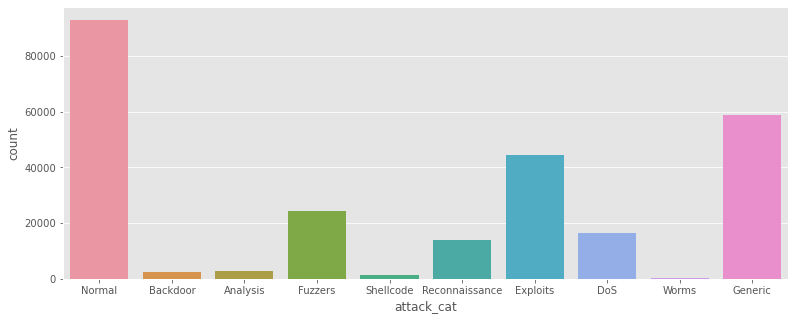

In [22]:
print('Distribution of attack types:', AttackLabel_ratio(attacks))
plt.figure(figsize=(13,5))
sns.countplot(attacks,label="Sum")
plt.show()

In [23]:
# Select categorical columns
categorical_columns = useful_data.select_dtypes(include=['object']).columns
# Encode categorical features with LabelEncoder
encoding = LabelEncoder()
useful_data[categorical_columns] = useful_data[categorical_columns].apply(encoding.fit_transform)

In [24]:
useful_data.head()

id       dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0   1  0.121478    113        0      4      6      4     258     172   
1   2  0.649902    113        0      4     14     38     734   42014   
2   3  1.623129    113        0      4      8     16     364   13186   
3   4  1.681642    113        3      4     12     12     628     770   
4   5  0.449454    113        0      4     10      6     534     268   

        rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  74.087490  ...                 1               1             0           0   
1  78.473372  ...                 1               2             0           0   
2  14.170161  ...                 1               3             0           0   
3  13.677108  ...                 1               3             1           1   
4  33.373826  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0           6   
1                 0           1           6                0           6   
2                 0           2           6                0           6   
3                 0           2           1                0           6   
4                 0           2          39                0           6   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 45 columns]

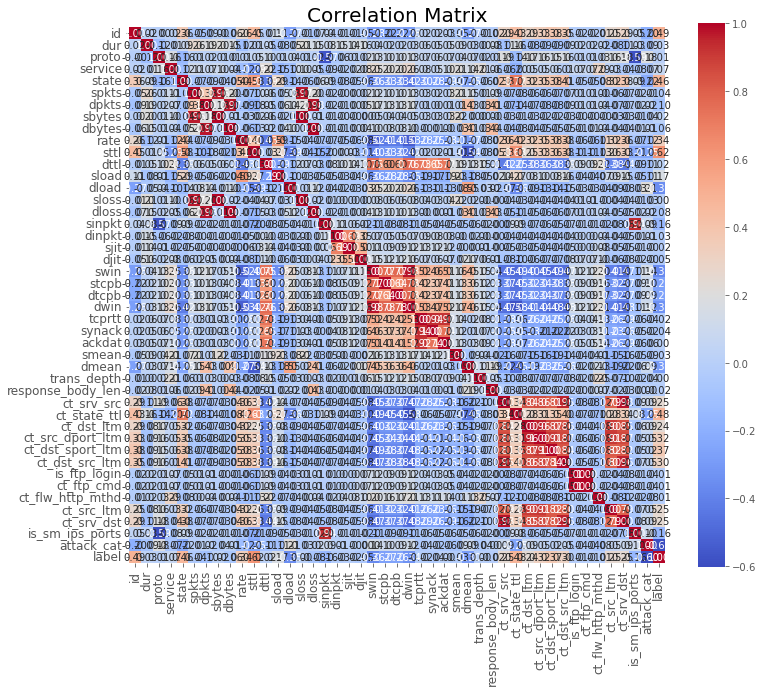

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(useful_data.corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [26]:
corr_matrix = useful_data.corr().abs()
correlated_vars = corr_matrix[corr_matrix > 0.98].stack().reset_index()
correlated_vars = correlated_vars[correlated_vars['level_0'] < correlated_vars['level_1']]
correlated_vars.columns = ['Var1', 'Var2', 'Corr']
correlated_vars = correlated_vars.sort_values(by='Corr', ascending=False)
print(correlated_vars)

          Var1          Var2      Corr
45  ct_ftp_cmd  is_ftp_login  0.998855
10      dbytes         dloss  0.996711
8       sbytes         sloss  0.995772
28        dwin          swin  0.980458


In [27]:
corr_matrix = useful_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]
useful_data = useful_data.drop(columns=to_drop)

In [28]:
useful_data

id       dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0          1  0.121478    113        0      4      6      4     258     172   
1          2  0.649902    113        0      4     14     38     734   42014   
2          3  1.623129    113        0      4      8     16     364   13186   
3          4  1.681642    113        3      4     12     12     628     770   
4          5  0.449454    113        0      4     10      6     534     268   
...      ...       ...    ...      ...    ...    ...    ...     ...     ...   
82327  82328  0.000005    119        0      5      2      0     104       0   
82328  82329  1.106101    113        0      4     20      8   18062     354   
82329  82330  0.000000      6        0      5      1      0      46       0   
82330  82331  0.000000      6        0      5      1      0      46       0   
82331  82332  0.000009    119        0      5      2      0     104       0   

                rate  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0          74.087490  ...                 1                 1               1   
1          78.473372  ...                 1                 1               2   
2          14.170161  ...                 1                 1               3   
3          13.677108  ...                 1                 1               3   
4          33.373826  ...                 2                 1              40   
...              ...  ...               ...               ...             ...   
82327  200000.005100  ...                 1                 1               2   
82328      24.410067  ...                 1                 1               1   
82329       0.000000  ...                 1                 1               1   
82330       0.000000  ...                 1                 1               1   
82331  111111.107200  ...                 1                 1               1   

       is_ftp_login  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0                 0                 0           1           1   
1                 0                 0           1           6   
2                 0                 0           2           6   
3                 1                 0           2           1   
4                 0                 0           2          39   
...             ...               ...         ...         ...   
82327             0                 0           2           1   
82328             0                 0           3           2   
82329             0                 0           1           1   
82330             0                 0           1           1   
82331             0                 0           1           1   

       is_sm_ips_ports  attack_cat  label  
0                    0           6      0  
1                    0           6      0  
2                    0           6      0  
3                    0           6      0  
4                    0           6      0  
...                ...         ...    ...  
82327                0           6      0  
82328                0           6      0  
82329                1           6      0  
82330                1           6      0  
82331                0           6      0  

[257673 rows x 41 columns]

In [29]:
useful_data = useful_data.drop(axis=1, columns=['id','attack_cat'])

In [30]:
useful_data

dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0      0.121478    113        0      4      6      4     258     172   
1      0.649902    113        0      4     14     38     734   42014   
2      1.623129    113        0      4      8     16     364   13186   
3      1.681642    113        3      4     12     12     628     770   
4      0.449454    113        0      4     10      6     534     268   
...         ...    ...      ...    ...    ...    ...     ...     ...   
82327  0.000005    119        0      5      2      0     104       0   
82328  1.106101    113        0      4     20      8   18062     354   
82329  0.000000      6        0      5      1      0      46       0   
82330  0.000000      6        0      5      1      0      46       0   
82331  0.000009    119        0      5      2      0     104       0   

                rate  sttl  ...  ct_dst_ltm  ct_src_dport_ltm  \
0          74.087490   252  ...           1                 1   
1          78.473372    62  ...           1                 1   
2          14.170161    62  ...           2                 1   
3          13.677108    62  ...           2                 1   
4          33.373826   254  ...           2                 2   
...              ...   ...  ...         ...               ...   
82327  200000.005100   254  ...           2                 1   
82328      24.410067   254  ...           2                 1   
82329       0.000000     0  ...           1                 1   
82330       0.000000     0  ...           1                 1   
82331  111111.107200   254  ...           1                 1   

       ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_flw_http_mthd  \
0                     1               1             0                 0   
1                     1               2             0                 0   
2                     1               3             0                 0   
3                     1               3             1                 0   
4                     1              40             0                 0   
...                 ...             ...           ...               ...   
82327                 1               2             0                 0   
82328                 1               1             0                 0   
82329                 1               1             0                 0   
82330                 1               1             0                 0   
82331                 1               1             0                 0   

       ct_src_ltm  ct_srv_dst  is_sm_ips_ports  label  
0               1           1                0      0  
1               1           6                0      0  
2               2           6                0      0  
3               2           1                0      0  
4               2          39                0      0  
...           ...         ...              ...    ...  
82327           2           1                0      0  
82328           3           2                0      0  
82329           1           1                1      0  
82330           1           1                1      0  
82331           1           1                0      0  

[257673 rows x 39 columns]

In [31]:
X = useful_data.drop(columns=['label'])
feature_list = list(X.columns)

In [32]:
print(len(feature_list))
feature_list

38


['dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [33]:
y = useful_data['label']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [35]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 180371
Testing set: 77302


In [36]:
standardrize_feature = StandardScaler().fit(X_train)
X_train = standardrize_feature.transform(X_train)
X_test = standardrize_feature.transform(X_test)

## GradientBoostingClassifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [70]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

In [71]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 93.23%
Recall: 93.23%
Precision: 93.21%
F1-Score: 93.21%
time to train: 51.69 s
time to predict: 0.11 s
total: 51.80 s


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


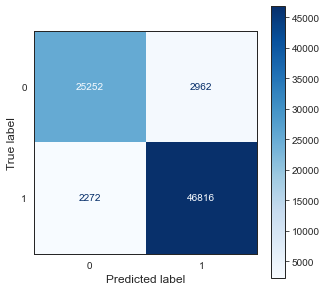

In [72]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

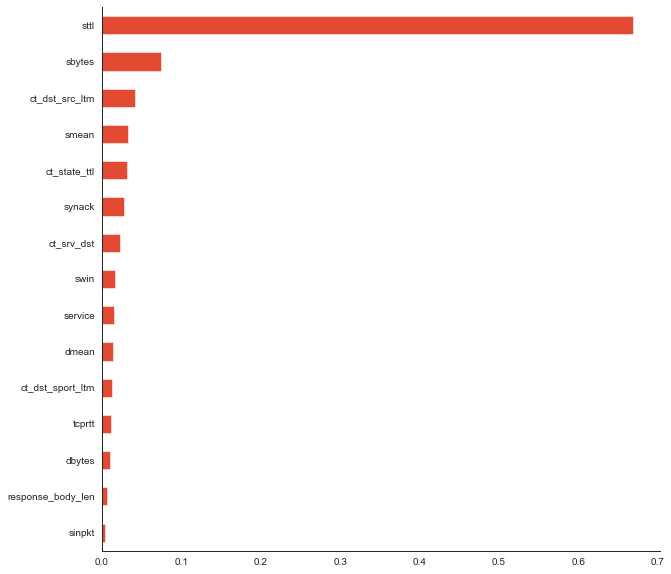

In [75]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_list)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(15).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [89]:
feat_importances

ackdat               0.000052
ct_dst_ltm           0.000066
ct_dst_sport_ltm     0.012355
ct_dst_src_ltm       0.041772
ct_flw_http_mthd     0.000422
ct_src_dport_ltm     0.000037
ct_src_ltm           0.000070
ct_srv_dst           0.022179
ct_srv_src           0.001432
ct_state_ttl         0.031666
dbytes               0.009690
dinpkt               0.000924
djit                 0.000010
dload                0.000678
dmean                0.013711
dpkts                0.000154
dtcpb                0.000086
dttl                 0.000422
dur                  0.000243
is_ftp_login         0.000000
is_sm_ips_ports      0.000022
proto                0.002642
rate                 0.000420
response_body_len    0.006270
sbytes               0.074684
service              0.015152
sinpkt               0.004268
sjit                 0.000360
sload                0.000650
smean                0.032885
spkts                0.000596
state                0.000111
stcpb                0.000048
sttl      

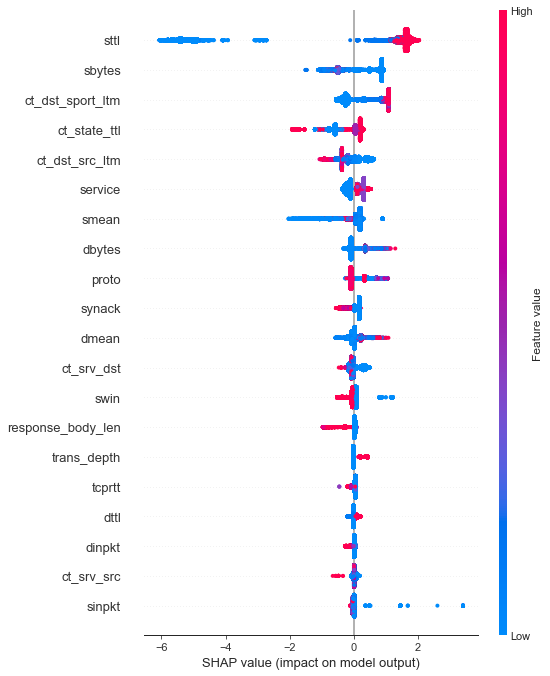

In [78]:
import shap

# Fit the SHAP explainer to the trained model and the training data
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot the summary plot of SHAP values for all predictions
shap.summary_plot(shap_values, X_test, feature_names=feature_list)

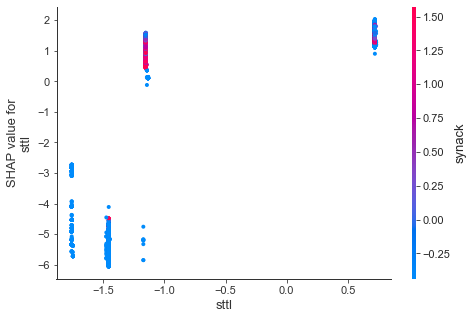

In [83]:
import shap
import matplotlib.pyplot as plt

# Fit the SHAP explainer to the trained model and the training data
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP dependency plot for a feature named 'feature_name'
feature_name = 'sttl' # Replace this with the name of the feature you want to plot
feature_idx = feature_list.index(feature_name)
shap.dependence_plot(feature_idx, shap_values, X_test, feature_names=feature_list)

# Show the plot
plt.show()


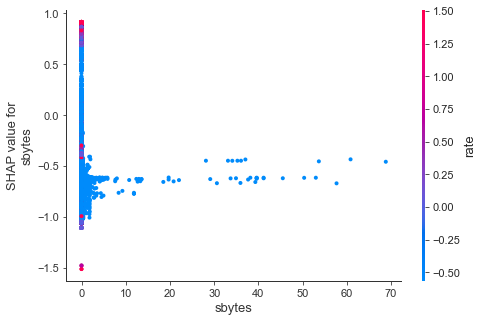

In [85]:
import shap
import matplotlib.pyplot as plt

# Fit the SHAP explainer to the trained model and the training data
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP dependency plot for a feature named 'feature_name'
feature_name = 'sbytes' # Replace this with the name of the feature you want to plot
feature_idx = feature_list.index(feature_name)
shap.dependence_plot(feature_idx, shap_values, X_test, feature_names=feature_list)

# Show the plot
plt.show()

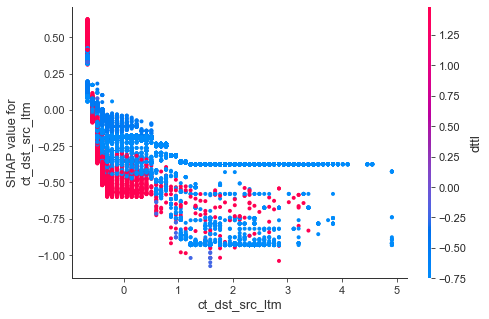

In [86]:
import shap
import matplotlib.pyplot as plt

# Fit the SHAP explainer to the trained model and the training data
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP dependency plot for a feature named 'feature_name'
feature_name = 'ct_dst_src_ltm' # Replace this with the name of the feature you want to plot
feature_idx = feature_list.index(feature_name)
shap.dependence_plot(feature_idx, shap_values, X_test, feature_names=feature_list)

# Show the plot
plt.show()

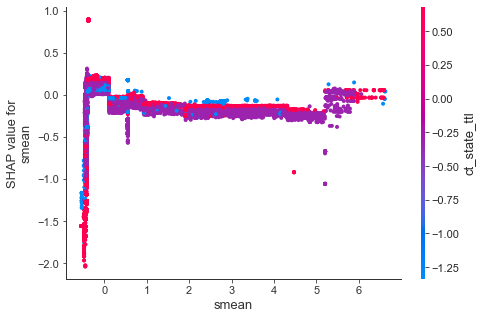

In [87]:
import shap
import matplotlib.pyplot as plt

# Fit the SHAP explainer to the trained model and the training data
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP dependency plot for a feature named 'feature_name'
feature_name = 'smean' # Replace this with the name of the feature you want to plot
feature_idx = feature_list.index(feature_name)
shap.dependence_plot(feature_idx, shap_values, X_test, feature_names=feature_list)

# Show the plot
plt.show()

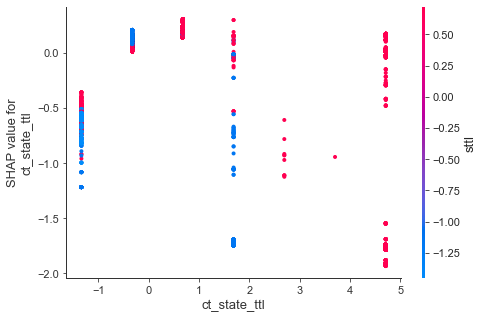

In [90]:
import shap
import matplotlib.pyplot as plt

# Fit the SHAP explainer to the trained model and the training data
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP dependency plot for a feature named 'feature_name'
feature_name = 'ct_state_ttl' # Replace this with the name of the feature you want to plot
feature_idx = feature_list.index(feature_name)
shap.dependence_plot(feature_idx, shap_values, X_test, feature_names=feature_list)

# Show the plot
plt.show()

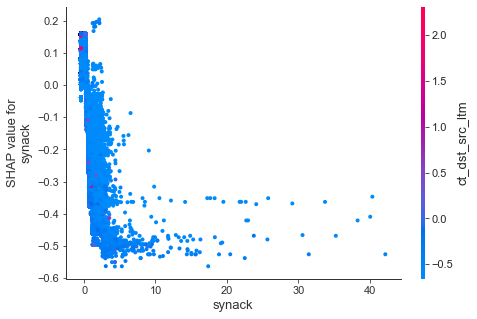

In [91]:
import shap
import matplotlib.pyplot as plt

# Fit the SHAP explainer to the trained model and the training data
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP dependency plot for a feature named 'feature_name'
feature_name = 'synack' # Replace this with the name of the feature you want to plot
feature_idx = feature_list.index(feature_name)
shap.dependence_plot(feature_idx, shap_values, X_test, feature_names=feature_list)

# Show the plot
plt.show()

# We will plot more in coming time

In [93]:
import shap
import matplotlib.pyplot as plt

# Fit the SHAP explainer to the trained model and the training data
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Get the feature importances
importances = model.feature_importances_
sorted_idx = importances.argsort()[::-1]
top_k_idx = sorted_idx[:10]
top_k_features = [feature_list[i] for i in top_k_idx]

# Create the SHAP interaction value summary plot for the top 10 features
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values[:,:,top_k_idx], X_test[:,top_k_idx], feature_names=top_k_features, show=False)
plt.title('Interaction effect of the 10 most important features', fontsize=14)

# Show the plot
plt.show()



AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [94]:
import shap
import matplotlib.pyplot as plt

# Fit the SHAP explainer to the trained model and the training data
explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X_test)

# Get the feature importances
importances = model.feature_importances_
sorted_idx = importances.argsort()[::-1]
top_k_idx = sorted_idx[:10]
top_k_features = [feature_list[i] for i in top_k_idx]

# Create the SHAP interaction value summary plot for the top 10 features
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values[:,:,top_k_idx], X_test[:,top_k_idx], feature_names=top_k_features, show=False)
plt.title('Interaction effect of the 10 most important features', fontsize=14)

# Show the plot
plt.show()


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [96]:
!pip install LIME

     |████████████████████████████████| 275 kB 742 kB/s eta 0:00:01
  Created wheel for LIME: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=61c6e9c8aa1644e14dba009cc829a401f321972c0d20d57ba405ed73e932e38f
  Stored in directory: /Users/mdtohidulislam/Library/Caches/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built LIME


In [97]:
from lime import lime_tabular
import numpy as np

# Create a LIME explainer object
explainer = lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_list, class_names=['normal', 'attack'], mode='classification')

# Choose a random sample from the test set to explain
idx = np.random.randint(len(X_test))
sample = X_test[idx]

# Explain the model prediction for the chosen sample
exp = explainer.explain_instance(sample, model.predict_proba, num_features=10)

# Print the LIME explanation
print('Document id: %d' % idx)
print('True class: %s' % y_test[idx])
print('Predicted class: %s' % model.predict(sample.reshape(1, -1))[0])

# Show the top 10 important features according to LIME
exp.show_in_notebook(show_table=True)


Document id: 10399
True class: 0
Predicted class: 1


## LSTM (Keras)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import to_categorical
import innvestigate
import innvestigate.utils.keras as kutils



In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import to_categorical
import innvestigate
import innvestigate.utils.keras as kutils

# Prepare the data
# Assume X_train, X_test, y_train, and y_test are already loaded

# Convert the class labels to one-hot encoded vectors
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test, y_test_onehot))

# Generate explanations using LRP
# Assume X_train, X_test, and model are already loaded

# Create an analyzer using the LRP algorithm
analyzer = innvestigate.create_analyzer("lrp.z", model)

# Choose a random sample from the test set to explain
idx = np.random.randint(len(X_test))
sample = X_test[idx]

# Use the analyzer to generate an explanation for the model prediction on the chosen sample
explanation = analyzer.analyze(sample.reshape(1, X_test.shape[1], X_test.shape[2]))

# Print the explanation
print('Document id: %d' % idx)
print('True class: %s' % y_test[idx])
print('Predicted class: %s' % np.argmax(model.predict(sample.reshape(1, X_test.shape[1], X_test.shape[2]))))
print('LRP explanation:', explanation)


## GRU

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
import numpy as np

## Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl

In [40]:
xg_train = xgboost.DMatrix(X_train, label=y_train)
xg_test = xgboost.DMatrix(X_test, label=y_test)

In [42]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model4 = xgboost.train(params, xg_train, 500, evals = [(xg_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.64867
[100]	test-logloss:0.28913
[200]	test-logloss:0.19499
[300]	test-logloss:0.15976
[400]	test-logloss:0.14328
[499]	test-logloss:0.13497


In [44]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model4)
shap_values_test = explainer.shap_values(X_test)

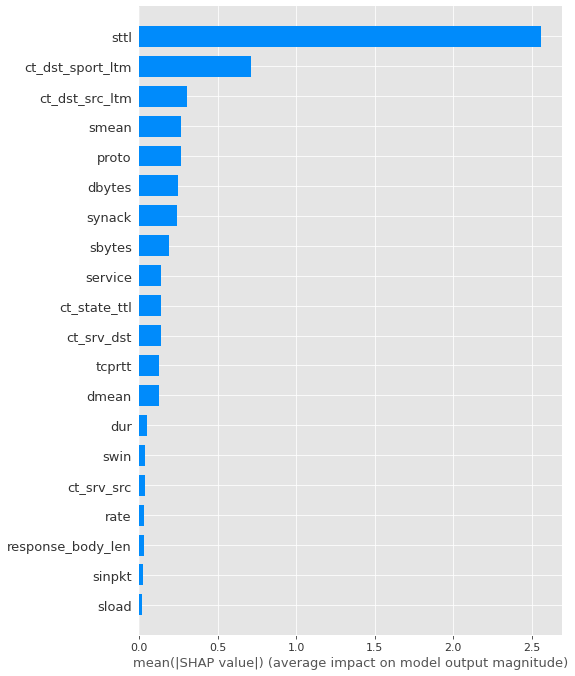

In [47]:
shap.summary_plot(shap_values_test, feature_list, plot_type="bar")

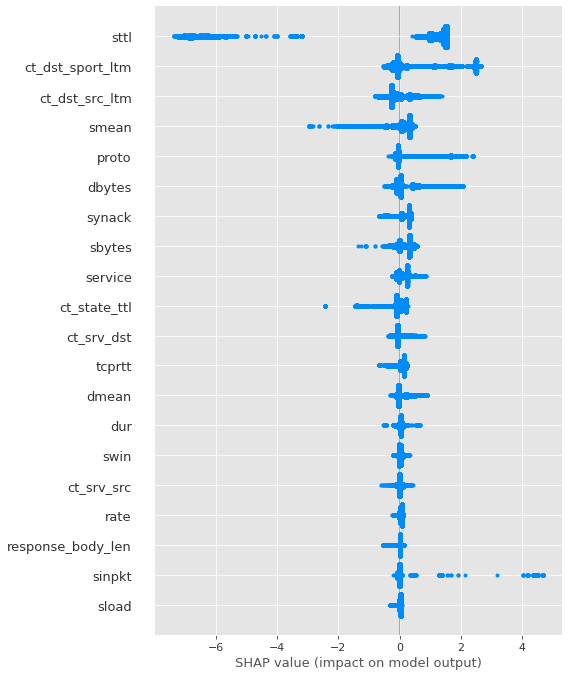

In [50]:
shap.summary_plot(shap_values_test, feature_list)

In [57]:
for name in X_test.columns:
    shap.dependence_plot(name, shap_values_test, X_test, display_features=X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

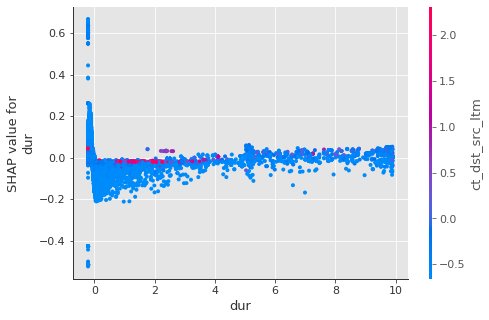

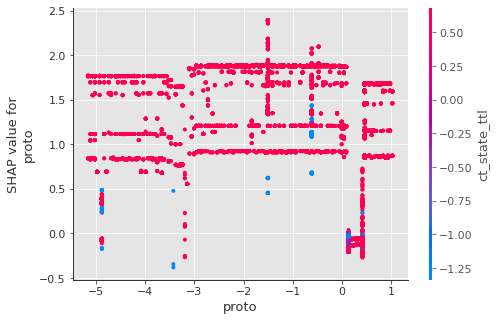

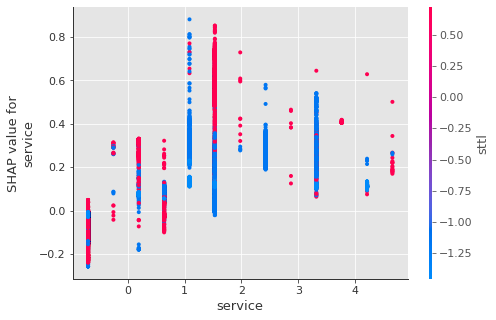

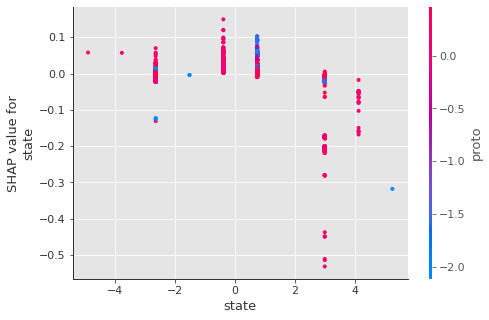

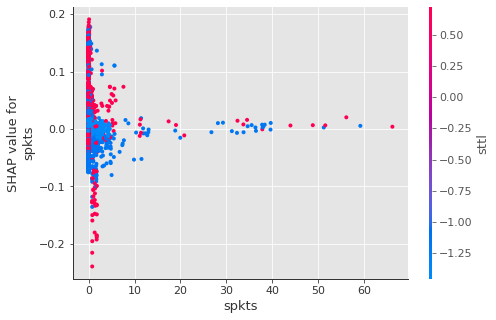

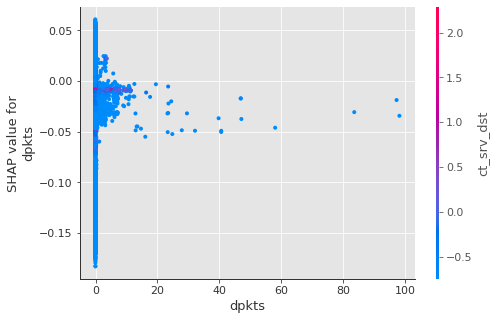

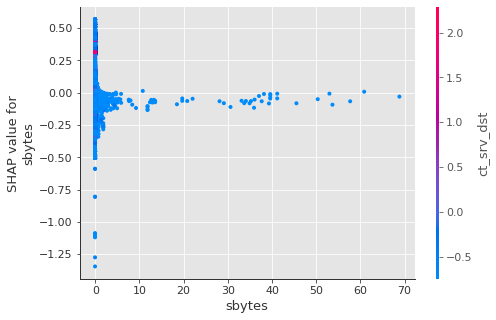

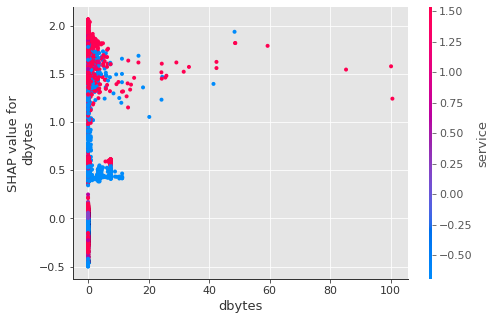

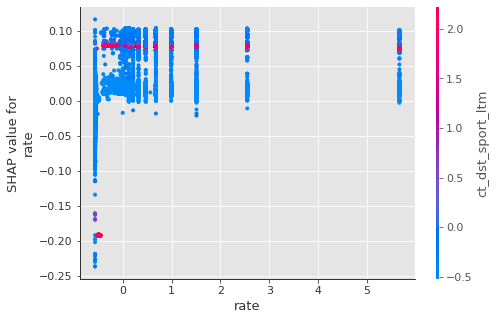

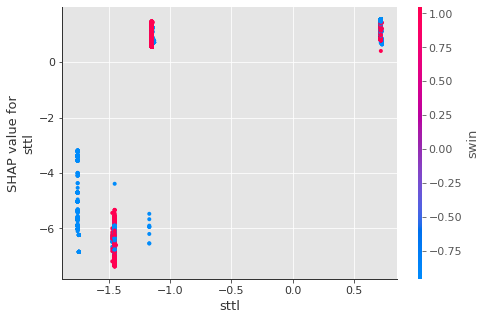

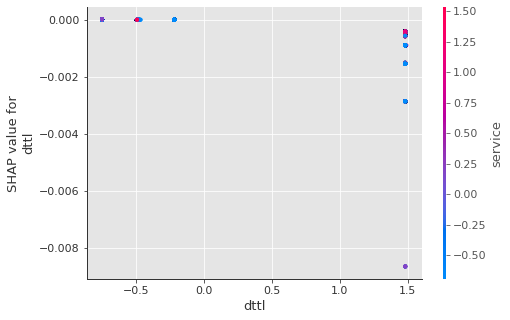

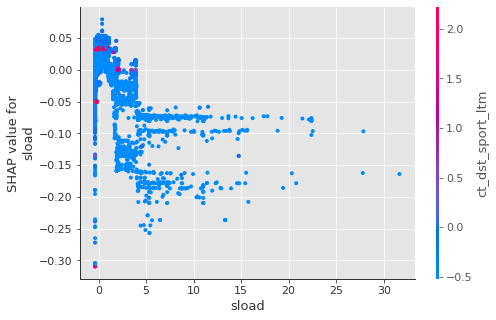

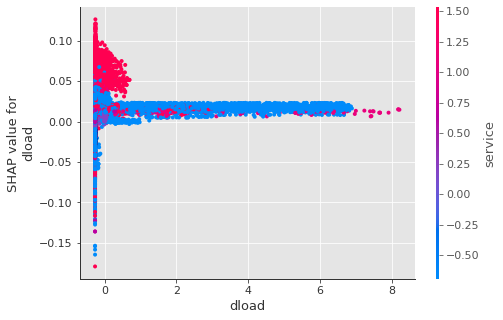

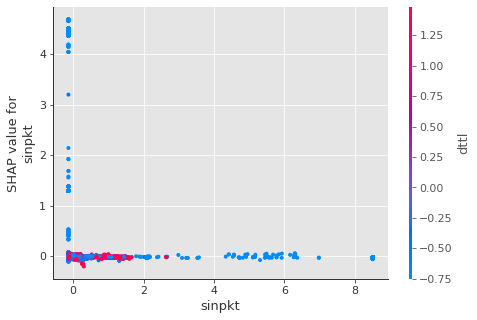

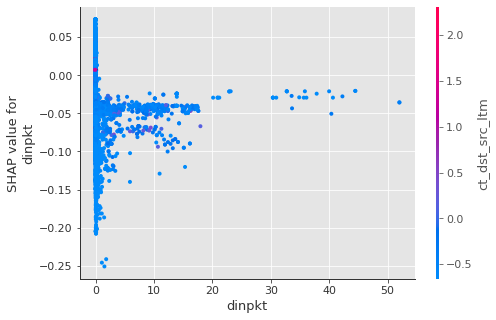

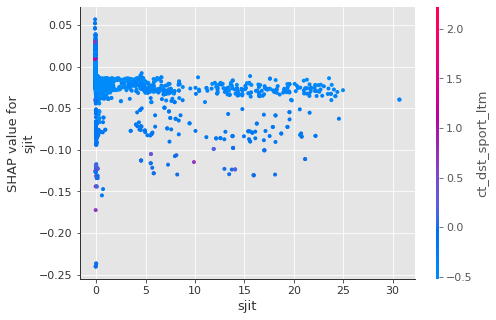

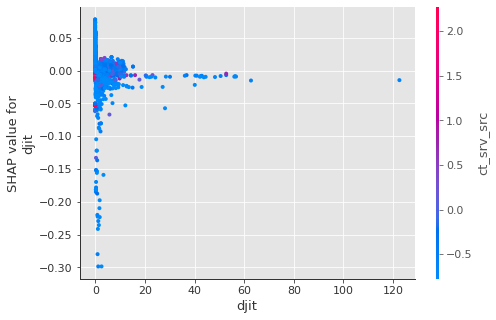

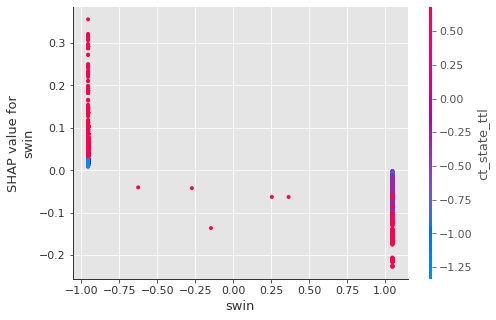

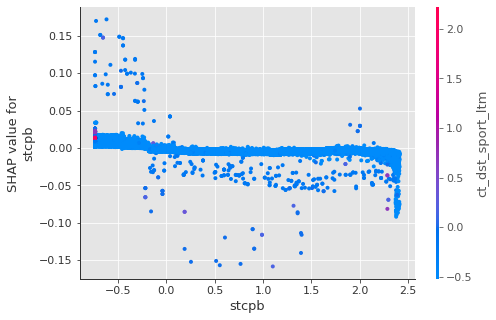

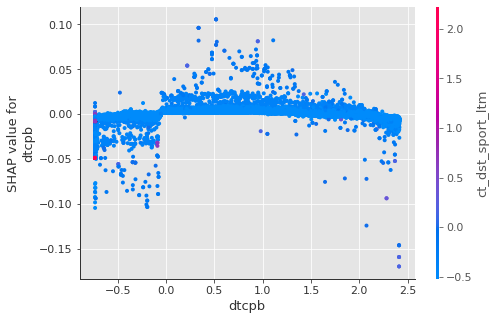

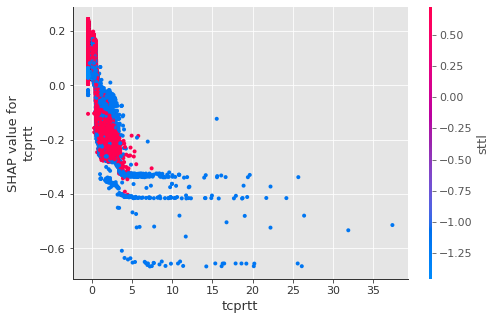

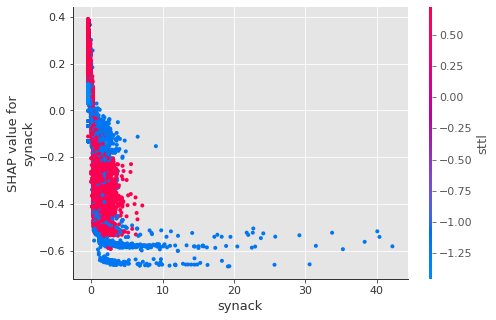

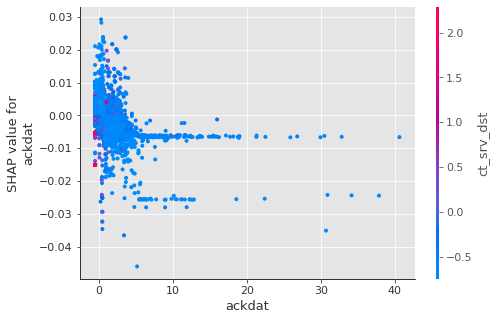

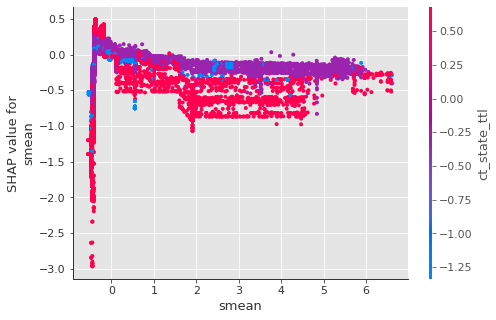

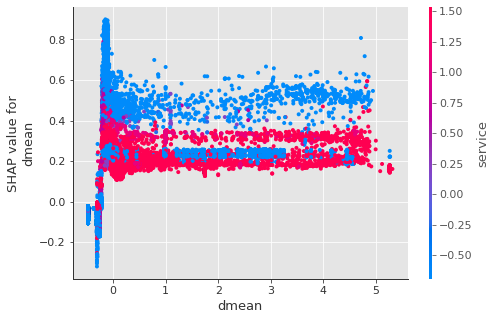

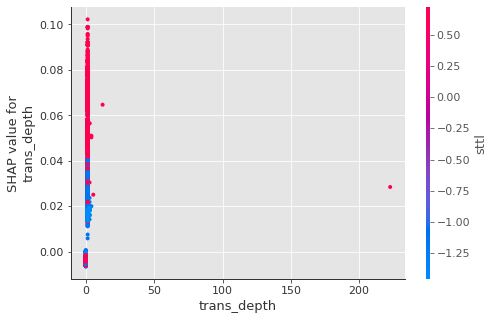

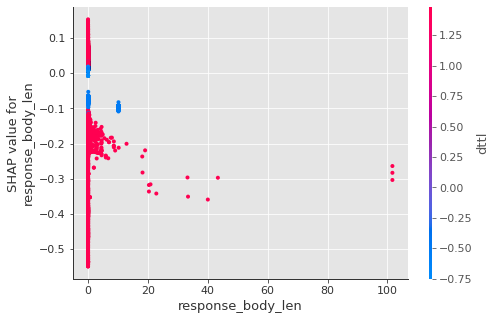

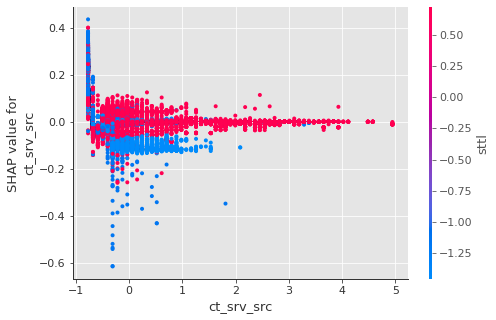

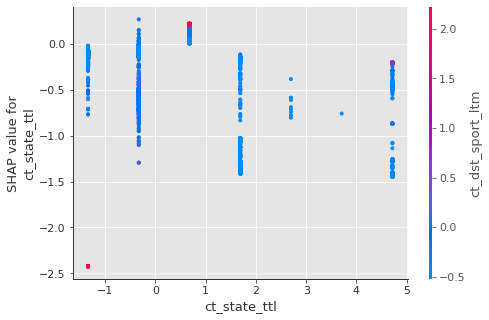

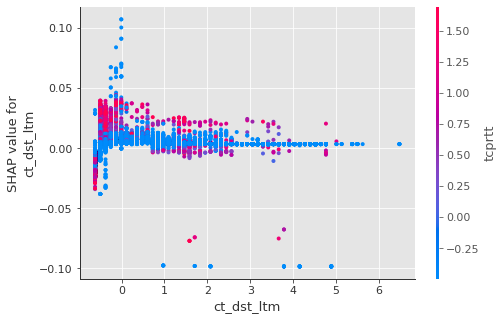

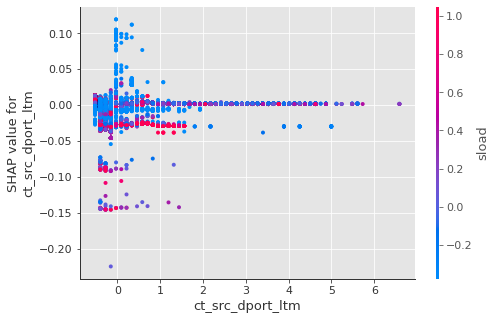

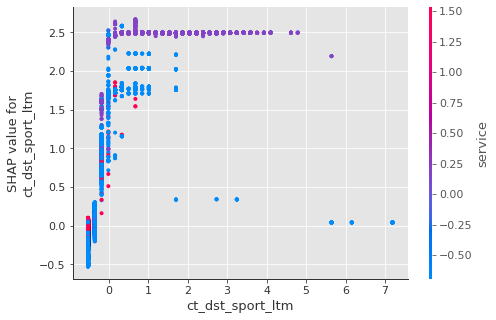

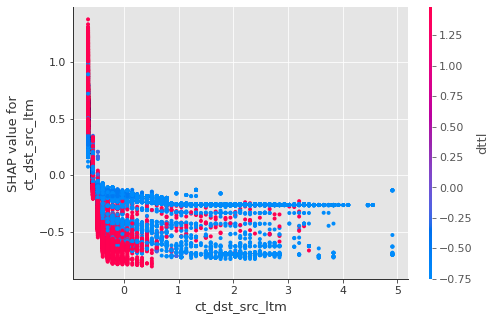

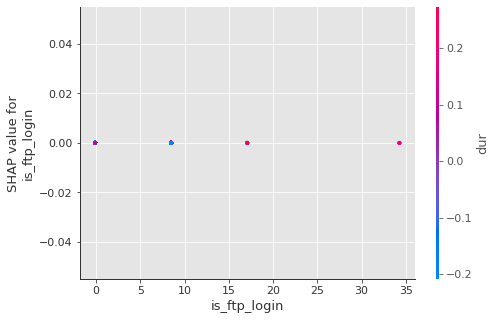

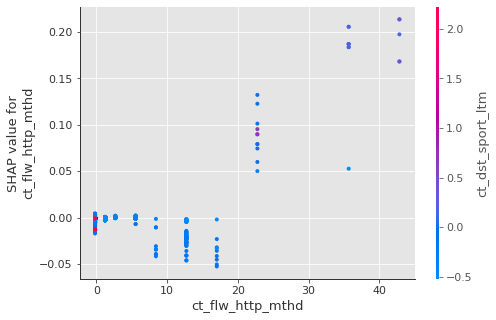

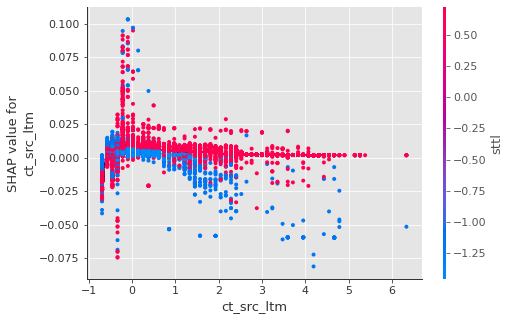

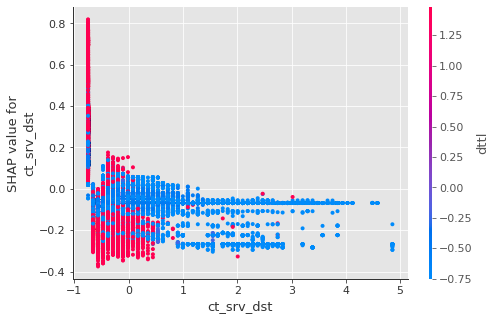

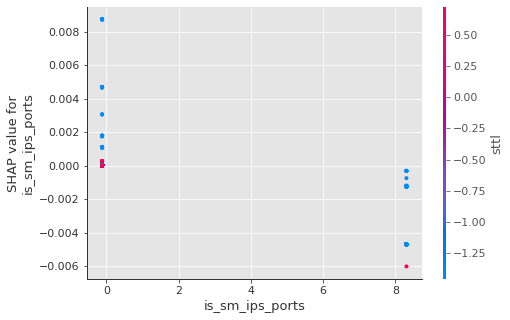

In [58]:
# Convert X_test numpy array to pandas DataFrame with named columns
X_test_df = pd.DataFrame(X_test, columns=X.columns)

for name in X_test_df.columns:
    shap.dependence_plot(name, shap_values_test, X_test_df, display_features=X_test_df)


## Alternative

In [59]:
import xgboost as xgb
import shap
import numpy as np

In [60]:
xg_train = xgboost.DMatrix(X_train, label=y_train)
xg_test = xgboost.DMatrix(X_test, label=y_test)

In [61]:
# Convert data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters for the model
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}

# Train the model
model_xgb = xgb.train(params, dtrain, num_boost_round=500, evals=[(dtest, "test")],
                  verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.64867
[100]	test-logloss:0.28913
[200]	test-logloss:0.19499
[300]	test-logloss:0.15976
[400]	test-logloss:0.14328
[499]	test-logloss:0.13497


In [64]:
explainer = shap.TreeExplainer(model_xgb)
shap_values_test = explainer.shap_values(X_test)

ValueError: ('Expecting 2 dimensional numpy.ndarray, got: ', (1, 1, 38))